<p style="font-family: Calibri; font-size:3em;color:purple; font-style:bold"><br>
Projekt: 2180-300 Granitztal<br><br><br> Innenschale - Anhydrit</p>

<p style="font-family: Calibri; font-size:1.75em;color:#2462C0; font-style:bold"><br>Umwandlung der Kontaktspannungen im Anschluss zu den Schnittgrößen</p>

![contact](Contact_Stress.JPG)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Eingabe der .csv-Datei ins Pandas

In [2]:
df = pd.read_csv('x_y2.csv', sep=';', header=0)
x_ = df['x_'][1:].dropna().astype(float)
stress = df['Effective stress-NN'][1:].dropna().astype(float)
df_xy = pd.DataFrame({'x':x_, 'y':stress})
df_xy

,x,y
1,0.00,0.0
2,0.07,0.0
3,0.07,0.0
4,0.13,0.0
5,0.13,0.0
6,0.20,0.0
7,0.20,0.0
8,0.26,0.0
9,0.26,0.0
10,0.33,0.0


### Ohne Null-Werte

In [3]:
data = df_xy[df_xy['y']<0].reset_index().drop('index', axis=1)
data

,x,y
0,0.39,-3040.0
1,0.39,-2690.0
2,0.46,-7470.0
3,0.46,-7470.0
4,0.52,-11300.0
5,0.52,-13900.0
6,0.59,-18200.0
7,0.59,-24500.0
8,0.65,-38100.0


### Grafik in Matplotlib

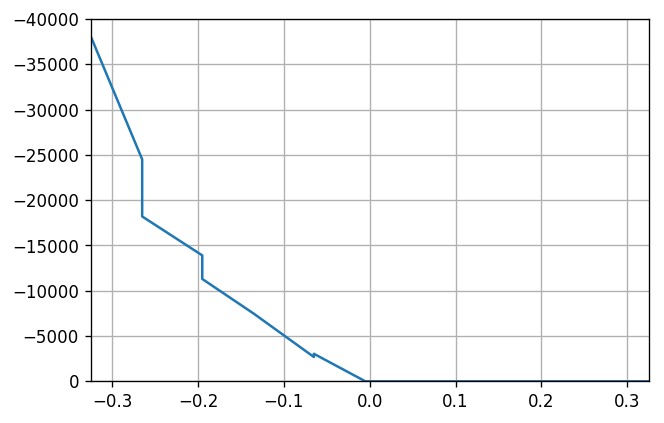

In [4]:
x_min = -1*max(df_xy['x'])/2.0
x_max = max(df_xy['x'])/2.0
plt.figure(dpi=120)
ax = plt.gca()
ax.invert_yaxis()
ax.grid(True)
ax.set_xlim([x_min,x_max])
ax.set_ylim([0,-40000])
plt.plot(-1*(df_xy['x'] - max(df_xy['x'])/2.0), df_xy['y']);

### Abschätzen der Fläche unterhalb der Linie gemäß Simpsons und Trepezoid

In [5]:
from scipy.integrate import simps, trapz
z = np.polyfit(df_xy['x'] - max(df_xy['x'])/2.0, df_xy['y'], 6)  # fit ploynomial 6rd degree 
p = np.poly1d(z)

In [6]:
x_p = np.linspace(-1*max(df_xy['x'])/2.0, max(df_xy['x'])/2.0, 100)

In [7]:
area1 = simps(p(x_p), x_p)
area2 = trapz(p(x_p), x_p)
print 'Fläche simpsons = ', area1
print 'Fläche trepezoid = ', area2

Fläche simpsons =  -3869.38091751
Fläche trepezoid =  -3870.91997079


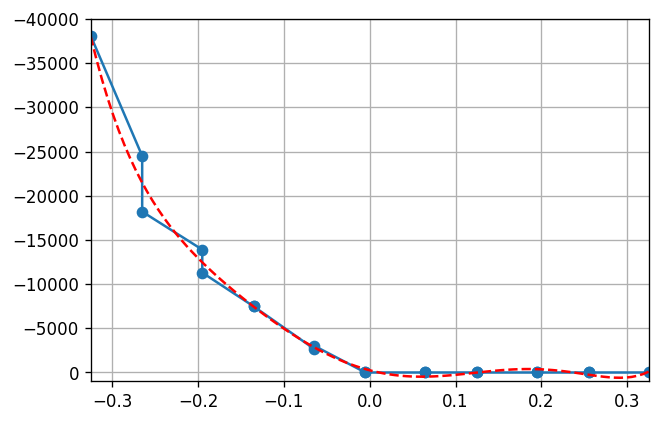

In [8]:
plt.figure(dpi=120)
ax = plt.gca()
ax.invert_yaxis()
ax.grid(True)
ax.set_xlim([x_min,x_max])
ax.set_ylim([1000,-40000])
plt.plot(-1*(df_xy['x'] - max(df_xy['x'])/2.0), df_xy['y'], 'o-', -1*x_p, p(x_p), 'r--');

### Hilfe-Funktion zum Konvertieren der Fläche ins N-M Paar

In [9]:
def find_N_M(sigma1, sigma2, h1, h2, H=0.65, B=1.0):
    """Berechnet Normalkraft und Moment, wobei B: Breite, H: Hoehe"""
    dH = (h2-h1)
    A = B * dH
    W = B * H * H / 6.0 
    normalkraft = (sigma1 + sigma2) / 2.0 * A
    moment = (sigma1 - sigma2) / 2.0 * W
    return moment, normalkraft

### Ergebnis:

In [10]:
m = np.array([])
n = np.array([])
for i, item in enumerate(x_p):
    try:
        moment, normalkraft = find_N_M(sigma1=p(x_p[i]), 
                                       sigma2=p(x_p[i+1]), 
                                       h1=x_p[i], 
                                       h2=x_p[i+1])
        m = np.append(m, moment)
        n = np.append(n, normalkraft)
    except IndexError:
        pass
print 'Moment = ', m.sum()
print 'Normalkraft = ', n.sum()

Moment =  1335.88835766
Normalkraft =  -3870.91997079


### Test der Hilfe-Funktion
- Bereich: von -0,25 bis 0,25 (h = 0,5m)
- $\sigma_1 = $ 100; $\sigma_2 = $ 200
- Erwartetes Ergebnis: $N = $ 75,0 ;$M = $ -2,083

In [11]:
x_test = np.linspace(-0.25,0.25,100)
y_test = x_test*200 + 150
test = (min(y_test), max(y_test))
test

(100.0, 200.0)

In [12]:
m_test = np.array([])
n_test = np.array([])
for i, _ in enumerate(x_test):
    try:
        moment, normalkraft = find_N_M(sigma1=(y_test[i]), 
                                       sigma2=(y_test[i+1]), 
                                       h1=x_test[i], 
                                       h2=x_test[i+1], 
                                       H=0.5)
        m_test = np.append(m_test, moment)
        n_test = np.append(n_test, normalkraft)
    except IndexError:
        pass
print 'Moment = ', m_test.sum()
print 'Normalkraft = ', n_test.sum()

Moment =  -2.08333333333
Normalkraft =  75.0
